# Data Analyst NanoDegree
# Project 2

# Dataset: Titanic
 Link: https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv  
 Description: https://www.kaggle.com/c/titanic/data  
 Outcome: To predict survival on Titanic.

# 1. Analyze Your Data

## Questions:

   1) What factors lead to survival on Titanic? Is it a particular type of gender (According to Kaggle women were more likely to survive than males), or a particlar age group (as a preference, children were sent in boats first), or is it a particular class of people (Upper class or lower class)?    
    2) How does family relations(siblings, parents, etc.) affect the rate of survival?  
    3) Is there a significance of Port of Embarkation on suvival which is not so evident just by look at the data columns?

# 2. Data Wrangling

## 2.1 Importing essential packages

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
%matplotlib inline
print "import done"

import done


## 2.2 Reading DataFrame

In [4]:
# Read csv into Pandas Dataframe and store in dataset variable
titanic_df = pd.read_csv('titanic-data.csv')

## 2.3 Investing DataSet

In [5]:
# Print the information of data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The Dataset 'titanic-data.csv' has 891 crows with 12 columns. Notice that the info for Age, Cabin, & Embarked has fewer data values, or there are missing values in these columns. The Data set has very less prorortion of missing values which means this should not affect the results much. Although, we must find ways to fill these missing values.

In [6]:
# View the first 5 rows of the dataframe to understand each columns format
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# What is the data type of each Data Column in the dataframe
def displayDataType(ColumnName):
    print ColumnName+":\t "+str(type(titanic_df[ColumnName][0]))

# Lets use the function to display the data type of each of the columns as processed by pandas
displayDataType('PassengerId')
displayDataType('Survived')
displayDataType('Pclass')
displayDataType('Name')
displayDataType('Sex')
displayDataType('Age')
displayDataType('SibSp')
displayDataType('Parch')
displayDataType('Ticket')
displayDataType('Fare')
displayDataType('Cabin')
displayDataType('Embarked')

PassengerId:	 <type 'numpy.int64'>
Survived:	 <type 'numpy.int64'>
Pclass:	 <type 'numpy.int64'>
Name:	 <type 'str'>
Sex:	 <type 'str'>
Age:	 <type 'numpy.float64'>
SibSp:	 <type 'numpy.int64'>
Parch:	 <type 'numpy.int64'>
Ticket:	 <type 'str'>
Fare:	 <type 'numpy.float64'>
Cabin:	 <type 'float'>
Embarked:	 <type 'str'>


Looking at the columns, first few rows and data type of each column, this dataframe needs some basic formatting/cleaning before we can perform it better. For e.g. notice that cabin is stored as 'float' type which should be 'string'.

## 2.4 Cleaning Data

### 2.4.1 Filling missing Age values
Age column has (891-714) 177 missing values. Although age is hard to guess in our data, replacing missing or NaN age values with median age values seems a good option.

In [8]:
# Replacing NaN ages with median
median_age = titanic_df['Age'].dropna().median()
# using pandas fillna() function to inplace change each NA values.
titanic_df['Age'].fillna(median_age, inplace=True)

### 2.4.2 Filling missing Embarked Values

In [9]:
# Printing the two rows of missing Port of Embarkation
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Notice both these are females with same ticket no and cabin. Lets find out if they did share their cabin or ticket with someone else?

In [10]:
# Getting the rows which have Embarked data value but share the same Ticket and Cabin number.
titanic_df[(titanic_df['Embarked'].notnull()) & ((titanic_df['Ticket'] == '113572') | (titanic_df['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Notice this is empty. That means we have to intuitively fill the two missing Embarked values. In this case replacing missing value with mode would be a good choice. Lets find out which port was most travelled by?

In [11]:
# Printing the count of each embarked values
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Since most people travelled by 'S'(Southampton) port, it makes sense to replace missing Embarked value with its mode i.e. 'S'.

In [12]:
# Replacing NaN Embarked with mode using pandas fillna() function
titanic_df['Embarked'].fillna('S',inplace=True)

### 2.4.2 Filling missing Cabin Values

In [13]:
# Before moving ahead lets check the data frame null values status.
print titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


- One may notice that there are no missing values in Age and Embarked columns now. Lets explore Cabin missing values.  
- There are 687 NaN Cabin values, it seems we would need to manipulate a whole lot of information in order to replace this. Also, Cabin information does not seems to affect the survival rate. Hence, Dropping this column makes much more sense to retain the relationship between other variables rather than imputing so many values.

In [14]:
# Dropping column Cabin
titanic_df = titanic_df.drop(['Cabin'], axis=1)

### 2.4.3 Removing other unnecessary columns

Columns like Name, Ticket also do not have much relevance to survival, hence we choose to remove those columns as well.

In [15]:
# Dropping columns Name, Ticket
titanic_df = titanic_df.drop(['Name', 'Ticket'], axis=1)

In [16]:
# This is how the DataFrame looks like post cleaning
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


We are now ready to investigate the Data and Analyze it.

# 3. Analysis of data

## 3.1 Investigating survival based on passengers Gender

In [17]:
# Building a new gender dataframe which has Columns grouped by Gender and Survival of each gender.
titanic_gender_df = titanic_df.groupby(['Sex', 'Survived'])
# Printing the first row of each type of data
print titanic_gender_df.head([1]) #Survived: 0,1; Sex: male,Female;

    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0             1         0       3    male  22.0      1      0   7.2500   
1             2         1       1  female  38.0      1      0  71.2833   
14           15         0       3  female  14.0      0      0   7.8542   
17           18         1       2    male  28.0      0      0  13.0000   

   Embarked  
0         S  
1         C  
14        S  
17        S  


In [18]:
#Lets get a count of Each group by combination (Survived: 0,1; Sex: male,Female;)
titanic_gender_passenger_count_df = titanic_gender_df.count()[['PassengerId']]
print titanic_gender_passenger_count_df

                 PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109


In [19]:
# A function to get the data frame values from key values of groupby columns
def converts_dataframe_to_values(df, selector1, selector2):
    return df.loc[selector1, selector2]

In [20]:
#rate of survival of female and male passengers
female_survived = converts_dataframe_to_values(titanic_gender_passenger_count_df,'female', 1 )
male_survived = converts_dataframe_to_values(titanic_gender_passenger_count_df, 'male', 1)
print "Female survived:",female_survived[0]
print "Male survived:", male_survived[0]

Female survived: 233
Male survived: 109


In [21]:
# Getting the percentage of female and male survival
female_survival_rate = (female_survived / titanic_df[titanic_df['Sex'] == 'female'].count()[['PassengerId']]) \
* 100
male_survival_rate = (male_survived / titanic_df[titanic_df['Sex'] == 'male'].count()[['PassengerId']]) * 100
print "Female survival percent:",female_survival_rate[0]
print "Male survival percent:", male_survival_rate[0]

Female survival percent: 74.2038216561
Male survival percent: 18.8908145581


We notice that female have clearly much more survival percentage than male. Hence its easy to say that from this dataset Female passengers had more survival proportion on Titanic than Male passengers. 

## 3.2 Investigating survival based on passengers Age

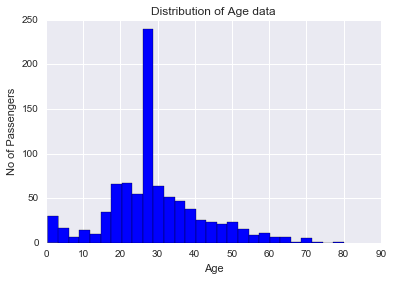

In [25]:
# Lets visualize the age data
#titanic_df['Age'].hist(bins=28)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(titanic_df['Age'], bins=28, histtype='bar')

#ax.set_xticklabels([n], rotation='vertical')

for patch in patches:
    patch.set_facecolor('b')

plt.title('Distribution of Age data')
plt.xlabel('Age')
plt.ylabel('No of Passengers')

We notice from the histogram that age data falls a maximum of 80 and most of the passengers lies in the range 20-30 age. Lets check.

In [26]:
youngestPassenger = titanic_df['Age'].min()
oldestPassenger = titanic_df['Age'].max()
avgPassenger = titanic_df['Age'].mean()
print "Youngest",youngestPassenger
print "Oldest",oldestPassenger
print "Average Age",avgPassenger

Youngest 0.42
Oldest 80.0
Average Age 29.3615824916


The values are as expected. Age must be grouped/binned in order to better analyze the data. We covert age of float value in the DataSet to integer as we are not analyzing infants right now.

In [27]:
titanic_df['Age'] = titanic_df['Age'].astype(int)

### Grouping / Binning Ages

We chose to divide the age groups in sets of size 10. i.e. 0-9, 10-19, ... , 70-79. We Stop here as the oldest person is of age 80. This is an outlier as well. For simplicity we consider this person to be in AgeGroup 70-79.

In [28]:
# We divide the age groups in set of 10 as follows
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# We add a new column for age group
titanic_df['AgeGroup'] = pd.cut(titanic_df.Age, range(0, 81, 10), right=False, labels=age_labels)
print titanic_df.tail()

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch   Fare Embarked  \
886          887         0       2    male   27      0      0  13.00        S   
887          888         1       1  female   19      0      0  30.00        S   
888          889         0       3  female   28      1      2  23.45        S   
889          890         1       1    male   26      0      0  30.00        C   
890          891         0       3    male   32      0      0   7.75        Q   

    AgeGroup  
886    20-29  
887    10-19  
888    20-29  
889    20-29  
890    30-39  


Notice the new colum AgeGroup and its values, for e.g. age 20-29 labelled for passenger whose age is 27. 

In [29]:
# Building a new age dataframe which has Columns grouped by AgeGroup and Survival of each gender.
titanic_age_df = titanic_df.groupby(['AgeGroup', 'Survived'])
# Printing the first row of each type of data
print titanic_age_df.head([1])

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare  \
0              1         0       3    male   22      1      0   7.2500   
1              2         1       1  female   38      1      0  71.2833   
2              3         1       3  female   26      0      0   7.9250   
4              5         0       3    male   35      0      0   8.0500   
6              7         0       1    male   54      0      0  51.8625   
7              8         0       3    male    2      3      1  21.0750   
9             10         1       2  female   14      1      0  30.0708   
10            11         1       3  female    4      1      1  16.7000   
11            12         1       1  female   58      0      0  26.5500   
14            15         0       3  female   14      0      0   7.8542   
30            31         0       1    male   40      0      0  27.7208   
33            34         0       2    male   66      0      0  10.5000   
52            53         1       1  fe

Notice we got some missing values in the range 70-80 For simplicity sake we would like to drop those rows as they anyhow seem outliers.

In [30]:
titanic_df = titanic_df[pd.notnull(titanic_df["AgeGroup"])]

In [31]:
# Lets Re-Group
titanic_age_df = titanic_df.groupby(['AgeGroup', 'Survived'])
# Printing the first row of each type of data
print titanic_age_df.head([1])

     PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare  \
0              1         0       3    male   22      1      0   7.2500   
1              2         1       1  female   38      1      0  71.2833   
2              3         1       3  female   26      0      0   7.9250   
4              5         0       3    male   35      0      0   8.0500   
6              7         0       1    male   54      0      0  51.8625   
7              8         0       3    male    2      3      1  21.0750   
9             10         1       2  female   14      1      0  30.0708   
10            11         1       3  female    4      1      1  16.7000   
11            12         1       1  female   58      0      0  26.5500   
14            15         0       3  female   14      0      0   7.8542   
30            31         0       1    male   40      0      0  27.7208   
33            34         0       2    male   66      0      0  10.5000   
52            53         1       1  fe

In [32]:
#Let us count each survival value from grouby data 
titanic_age_passenger_count_df = titanic_age_df.count()[['PassengerId']]
print titanic_age_passenger_count_df

                   PassengerId
AgeGroup Survived             
0-9      0                24.0
         1                38.0
10-19    0                61.0
         1                41.0
20-29    0               268.0
         1               129.0
30-39    0                94.0
         1                73.0
40-49    0                55.0
         1                34.0
50-59    0                28.0
         1                20.0
60-69    0                13.0
         1                 6.0
70-79    0                 6.0
         1                 NaN


The value for AgeGroup: 70-79 and survived: 1 is NaN. Lets see why...

In [33]:
titanic_df[titanic_df['AgeGroup'] == '70-79']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
96,97,0,1,male,71,0,0,34.6542,C,70-79
116,117,0,3,male,70,0,0,7.7500,Q,70-79
493,494,0,1,male,71,0,0,49.5042,C,70-79
672,673,0,2,male,70,0,0,10.5000,S,70-79
745,746,0,1,male,70,1,1,71.0000,S,70-79
851,852,0,3,male,74,0,0,7.7750,S,70-79


There are 6 rows fetched. We notice that none of the 6 passengers from agegroup 70-79 were able to survive. This tells us the reason for NaN in the count value.

In [34]:
# We get follow the same method as we did for analyzing based on gender.
G0_survived = converts_dataframe_to_values(titanic_age_passenger_count_df,'0-9', 1)
G1_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '10-19', 1)
G2_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '20-29', 1)
G3_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '30-39', 1)
G4_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '40-49', 1)
G5_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '50-59', 1)
G6_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '60-69', 1)
G7_survived = converts_dataframe_to_values(titanic_age_passenger_count_df, '70-79', 1)


G0_survival_rate = (G0_survived / titanic_df[titanic_df['AgeGroup'] == '0-9'].count()[['PassengerId']]) * 100
G1_survival_rate = (G1_survived / titanic_df[titanic_df['AgeGroup'] == '10-19'].count()[['PassengerId']]) * 100
G2_survival_rate = (G2_survived / titanic_df[titanic_df['AgeGroup'] == '20-29'].count()[['PassengerId']]) * 100
G3_survival_rate = (G3_survived / titanic_df[titanic_df['AgeGroup'] == '30-39'].count()[['PassengerId']]) * 100
G4_survival_rate = (G4_survived / titanic_df[titanic_df['AgeGroup'] == '40-49'].count()[['PassengerId']]) * 100
G5_survival_rate = (G5_survived / titanic_df[titanic_df['AgeGroup'] == '50-59'].count()[['PassengerId']]) * 100
G6_survival_rate = (G6_survived / titanic_df[titanic_df['AgeGroup'] == '60-69'].count()[['PassengerId']]) * 100
G7_survival_rate = 0.00 #As we found out earlier

print "Group 0-9 survival percent:",G0_survival_rate[0]
print "Group 10-19 survival percent:", G1_survival_rate[0]
print "Group 20-29 survival percent:",G2_survival_rate[0]
print "Group 30-39 survival percent:",G3_survival_rate[0]
print "Group 40-49 survival percent:",G4_survival_rate[0]
print "Group 50-59 survival percent:",G5_survival_rate[0]
print "Group 60-69 survival percent:",G6_survival_rate[0]
print "Group 70-79 survival percent:",G7_survival_rate

Group 0-9 survival percent: 61.2903225806
Group 10-19 survival percent: 40.1960784314
Group 20-29 survival percent: 32.4937027708
Group 30-39 survival percent: 43.7125748503
Group 40-49 survival percent: 38.202247191
Group 50-59 survival percent: 41.6666666667
Group 60-69 survival percent: 31.5789473684
Group 70-79 survival percent: 0.0


Clearly most chlidren survived. This may be a clear indication that at the time of evacuation, children and females were the first ones to be sent on boats. And hence they were the most survived ones.

## 3.3 Investigating survival based on passengers Class

As per the description of titanic data, Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [35]:
# We would also like to explore based on Passenger class.
titanic_Pclass_df = titanic_df.groupby(['Pclass', 'Survived'])

In [36]:
# We take a count of each groupby type
titanic_Pclass_passenger_count_df = titanic_Pclass_df.count()[['PassengerId']]
print titanic_Pclass_passenger_count_df

                 PassengerId
Pclass Survived             
1      0                  80
       1                 135
2      0                  97
       1                  87
3      0                 372
       1                 119


In [37]:
C1_survived = converts_dataframe_to_values(titanic_Pclass_passenger_count_df, 1, 1)
C2_survived = converts_dataframe_to_values(titanic_Pclass_passenger_count_df, 2, 1)
C3_survived = converts_dataframe_to_values(titanic_Pclass_passenger_count_df, 3, 1)

C1_survival_rate = (C1_survived / titanic_df[titanic_df['Pclass'] == 1].count()[['PassengerId']]) * 100
C2_survival_rate = (C2_survived / titanic_df[titanic_df['Pclass'] == 2].count()[['PassengerId']]) * 100
C3_survival_rate = (C3_survived / titanic_df[titanic_df['Pclass'] == 3].count()[['PassengerId']]) * 100

print "Pclass 1 survival percent:",C1_survival_rate[0]
print "Pclass 2 survival percent:",C2_survival_rate[0]
print "Pclass 3 survival percent:",C3_survival_rate[0]

Pclass 1 survival percent: 62.7906976744
Pclass 2 survival percent: 47.2826086957
Pclass 3 survival percent: 24.2362525458


Clearly Upper class passengers survied the most. My guess is rich people found out ways to sit on boat first ones by paying than lower class people who could not have afford it.

## 3.3 Investigating survival based on Family Relations

I would like to find the family size  based on the Parent&Children plus sibling&spouses.  
FamilySize = self + number of parents/children + number of siblings/spouses

In [38]:
## adding a new column family size, contains total family size
titanic_df['Familysize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

/Users/ankita_mehta/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
# dividing data on basis of familysize and then taking mean of survival rate
print titanic_df.groupby(['Familysize']).mean()[['Survived']] * 100

             Survived
Familysize           
1           30.223881
2           55.279503
3           57.843137
4           72.413793
5           20.000000
6           13.636364
7           33.333333
8            0.000000
11           0.000000


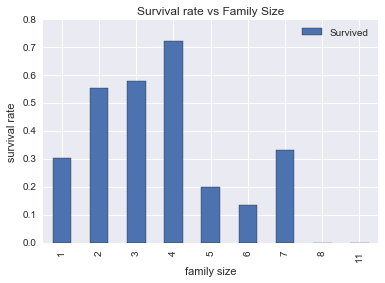

In [44]:
plot = titanic_df.groupby(['Familysize']).mean()[['Survived']].plot(kind="bar", title="Survival rate vs Family Size")
plot.set_xlabel("family size");
plot.set_ylabel("survival rate");

[ 1  2  3  4  5  6  7  8 11]
[ 0.30223881  0.55279503  0.57843137  0.72413793  0.2         0.13636364
  0.33333333  0.          0.        ]


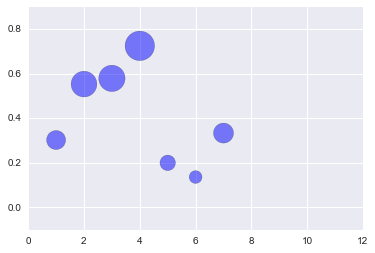

In [100]:
series = titanic_df.groupby(['Familysize']).mean()[['Survived']]

print series['Survived'].index.values
print series['Survived'].values

N = 50
x = series['Survived'].index.values
y = series['Survived'].values

#colors = np.random.rand(N)

plt.scatter(x, y, s=y*1200, alpha=0.5)
plt.show()

Notice the scatter plot with bigger circle in mostly middle sized families and it goes smaller as family size increases. One may notice that there is no circle for family size 11, i.e. its survival percent is 0.

The relation for the survival based on family size seems a bit wierd. According to me people who were single should have survived more as they had no liabilities and should have reached a safe place first. But the data tells only ~30% of those could survive. A middle size family had better survival(2,3,4) as there might be children and females along which got chance to sit in boats first. People with larger family size could not survive much as they could not have been accomodated together or they could be at same place at the time of diaster and were looking for each other.

## 3.4 Investigating survival based on Port of Embarkation

In [101]:
# Count of passengers boarding from different embarked ports
print titanic_df.groupby('Embarked').count()[['PassengerId']]

passenger_count_c = titanic_df.groupby('Embarked').count()[['PassengerId']].loc[['C']]
passenger_count_q = titanic_df.groupby('Embarked').count()[['PassengerId']].loc[['Q']]
passenger_count_s = titanic_df.groupby('Embarked').count()[['PassengerId']].loc[['S']]

          PassengerId
Embarked             
C                 168
Q                  77
S                 645


In [102]:
#overall passenger survival average
print "Overall passenger survival percentage",titanic_df[['Survived']].mean()[0] * 100

Overall passenger survival percentage 38.3146067416


In [103]:
#average survival rate of all 3 embarked ports
print titanic_df.groupby('Embarked').mean()[['Survived']] * 100

           Survived
Embarked           
C         55.357143
Q         38.961039
S         33.798450


Notice there are very few people from southamptom who could survive. But most of the people embarked at Southampton. Then why did they survived the least. Let us to know what could have been the reason by exploring further based on gender first.

In [104]:
titanic_embarked_gender = titanic_df.groupby(['Embarked', 'Sex']).count()[['PassengerId']]
print titanic_embarked_gender

                 PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          205
         male            440


/Users/ankita_mehta/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning:

matplotlib is currently using a non-GUI backend, so cannot show the figure



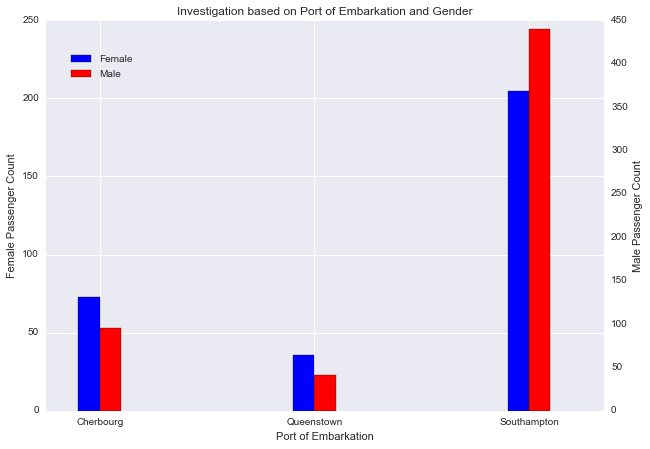

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.1

list_ti = titanic_embarked_gender['PassengerId']
list_f = []
list_m = []

list_f.append(list_ti[0])
list_m.append(list_ti[1])
list_f.append(list_ti[2])
list_m.append(list_ti[3])
list_f.append(list_ti[4])
list_m.append(list_ti[5])

list_f = pd.DataFrame(list_f)
list_m = pd.DataFrame(list_m)


list_f.plot(kind='bar',color='blue',grid=True,ax=ax,width=width,position=1,figsize=(10, 7))
list_m.plot(kind='bar',color='red',ax=ax2,grid=False,width=width, position=0,figsize=(10, 7))

ax.set_ylabel('Female Passenger Count')
ax2.set_ylabel('Male Passenger Count')
ax.set_xlabel('Port of Embarkation')
ax.set_xticklabels( ('Cherbourg', 'Queenstown', 'Southampton'), rotation=0 )

ax.legend(["Female"], loc="center", bbox_to_anchor=(0.1, 0.9))
ax2.legend(["Male"],loc="center", bbox_to_anchor=(0.09, 0.86))

plt.title("Investigation based on Port of Embarkation and Gender")

fig.show()

Notice that most of the people got in ship through Southampton. And Among those most were males. Where as in Cherbourg and Queenstown most of the females survived. Well the intuition that Southampton might have less no of females and children, and so its survival rate was low proved to be wrong.  


We next explore on the basis of Pclass.

We earlier found out that upper class people survived the most. Is there a relation between Pclass and thier Port of Embarkation?

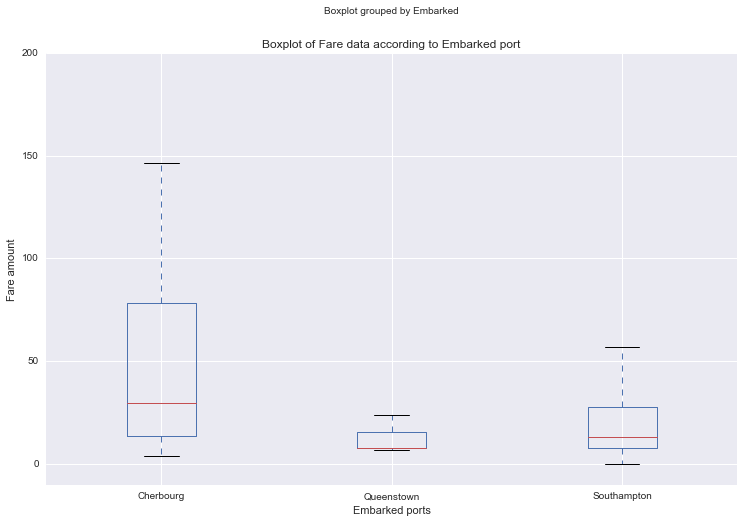

In [121]:
#Investigating based on Embarkation and PClass
pp = plt.figure();
data_plot = pd.DataFrame(titanic_df[["Fare", "Embarked"]]);
bp = data_plot.boxplot(by='Embarked', figsize=(12,8),return_type='axes');
for ax in bp.values():
    ax.set_ylim(-10, 200)
    ax.set_xticklabels(('Cherbourg', 'Queenstown', 'Southampton'), rotation=0)

plt.title("Boxplot of Fare data according to Embarked port");
plt.ylabel("Fare amount");
plt.xlabel("Embarked ports");

plt.show()

The above box plot shows that Chebourg had higher fare amount than Queenstown and Southampton. But very few people embarked from Chebourg Port. This means that rich people got in ship through Chebourg Port. Notice that chebourg had a survival percentage of ~55%(highest). This affirms the intuition that rich people had higher survival rate. The reason could be that they might have bribed the staff there to get in the boats first.

# 4. Conclusion

From the intial Questions, I got most of my answers by various parts of data exploration during this assignment. I would like to go through each of the questions again to verify if I could answer them all.

##### 1) What factors lead to survival on Titanic? Is it a particular type of gender (According to Kaggle women were more likely to survive than males), or a particlar age group (as a preference, children were sent in boats first), or is it a particular class of people (Upper class or lower class)?

A)We did detailed analysis on each type of feature or column and tried to consider it with survival parameter. Clearly, females and children had the higher surviving rate. We also found out that mostly people in group range 0-9 survived the most. No person in the age group 70-79 survived. We also found that Passenger class did affect the survival of his/her. Rich people or people in Upper Class social status had higher survival rates. 

##### 2) How does family relations(siblings, parents, etc.) affect the rate of survival?

A) People with larger family size had a very low survival chance and so did single persons(strangely). Passengers with family size of 2,3,4 had higher survival percentage as they might have involved females and children.

##### 3) Is there a significance of Port of Embarkation on survival which is not so evident just by looking at the data columns?
 
A) We Did detailed analysis on the relation between Port of Embarkation and survival. On that note we were able to make the conclusion that Rich people got in from Chebourg Port.

#### Limitations of analysis:  
There were 3 columns: Age, Cabin and Embarked with missing values. For e.g. we choose to use median for missing age data, this can add noise to our data as this was imputed for more than 200 missing values which more than 20% of our data. In case of missing Embarkment values, we were sort of lucky as only 2 values were missing, and so using mode was to replace these values was not such a bad choice. We removed the column Cabin as there were so many missing values. This could be a limitation to our analysis as having cabin data could have some insights which we are keeping out of scope for now.

# 5. References

- http://matplotlib.org/examples/pylab_examples/boxplot_demo.html
- http://pandas.pydata.org/pandas-docs/stable/api.html